In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn as nn

In [ ]:
#Define the input
ip = np.expand_dims(np.arange(-1.5, 1.5, 0.01),1)

#We'll be using sinc() function to generate output
op = np.sinc(5*ip)

In [ ]:
# Convert np arr to tensors
x = torch.tensor(ip, dtype=torch.float32)
y = torch.tensor(op, dtype=torch.float32)

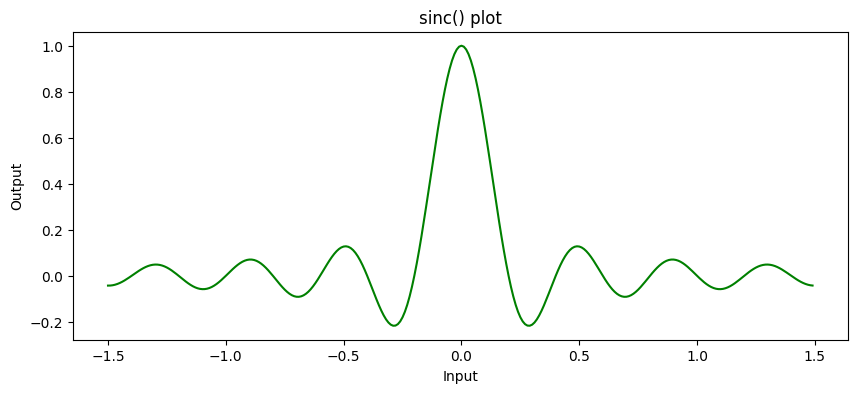

In [ ]:
# Graph for the function
plt.figure(figsize=(10,4))
plt.plot(x, y, color = "green")
plt.title('sinc() plot')
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()

In [ ]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.l1 = nn.Linear(1, 4)
        self.l2 = nn.Linear(4, 9)
        self.l3 = nn.Linear(9, 12)
        self.l4 = nn.Linear(12, 10)
        self.l5 = nn.Linear(10, 10)
        self.l6 = nn.Linear(10, 10)
        self.l7 = nn.Linear(10, 4)
        self.l8 = nn.Linear(4, 1)

    def forward(self,x):
        x = nn.functional.leaky_relu(self.l1(x))
        x = nn.functional.leaky_relu(self.l2(x))
        x = nn.functional.leaky_relu(self.l3(x))
        x = nn.functional.leaky_relu(self.l4(x))
        x = nn.functional.leaky_relu(self.l5(x))
        x = nn.functional.leaky_relu(self.l6(x))
        x = nn.functional.leaky_relu(self.l7(x))
        x = self.l8(x)

        return x

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
def train_model(model, x, y):
    epoch_size = 4000
    loss_arr = []
    epoch_arr = []
    grad_arr = []
    converged = False
    print('Begining training')

    # Move input data to GPU
    x, y = x.to(device), y.to(device)

    for epoch in range(epoch_size):
        if(converged):
            return epoch_arr, loss_arr, y_prediction, grad_arr

        y_prediction = model(x)
        loss = loss_func(y_prediction, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_arr.append(epoch)
        loss_arr.append(loss.detach().cpu().numpy())

        #Calculate the gradiet
        grad_all = 0.0
        for p in model.parameters():
            grad = 0.0
            if p.grad is not None:
                grad = (p.grad.cpu().data.numpy()**2).sum()
            grad_all += grad
        grad_norm = grad_all ** 0.5

        grad_arr.append(grad_norm)

        if epoch % 400 == 0:
            print(f'Epoch - {epoch}, Loss - {loss.item():.4f}, grad - {grad_norm}')

        if (epoch > 5) and  (loss_arr[-1] < 0.001):
            if abs(loss_arr[-3] - loss_arr[-2]) < 1.0e-05 and abs(loss_arr[-2] - loss_arr[-1]) < 1.0e-05:
                print("Convergence reached- ",loss_arr[-1])
                converged = True

    print('Training Completed')
    return epoch_arr, loss_arr, y_prediction, grad_arr

In [ ]:
model = Model().to(device)
loss_func = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3, weight_decay = 1e-5)

epoch_arr, loss_arr, prediction, grad_arr = train_model(model, x, y)

Begining training
Epoch - 0, Loss - 0.2038, grad - 0.9292664242475583
Epoch - 400, Loss - 0.0053, grad - 0.0016325965270141483
Epoch - 800, Loss - 0.0017, grad - 0.00300002446009954
Epoch - 1200, Loss - 0.0013, grad - 0.0027283338896701933
Epoch - 1600, Loss - 0.0012, grad - 0.0023481139441784223
Epoch - 2000, Loss - 0.0011, grad - 0.0014120654066241928
Convergence reached-  0.0009993047


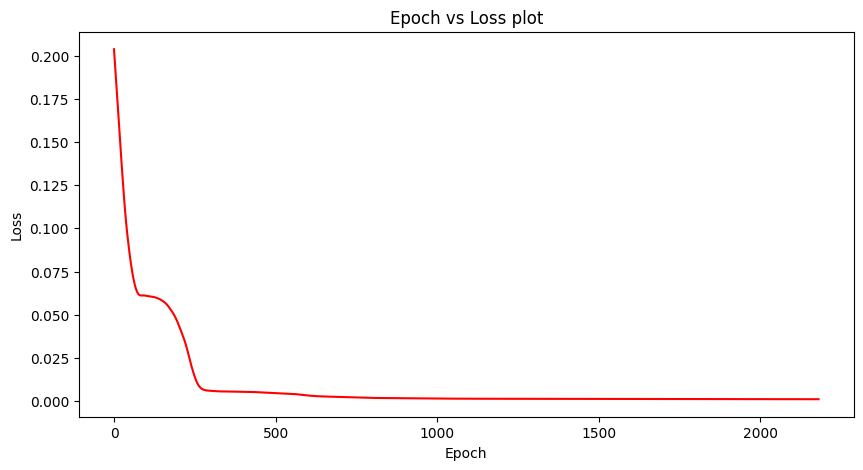

In [ ]:
# Epoch vs loss graph
plt.figure(figsize=(10,5))
plt.plot(epoch_arr, loss_arr, color = "red")
plt.title('Epoch vs Loss plot')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

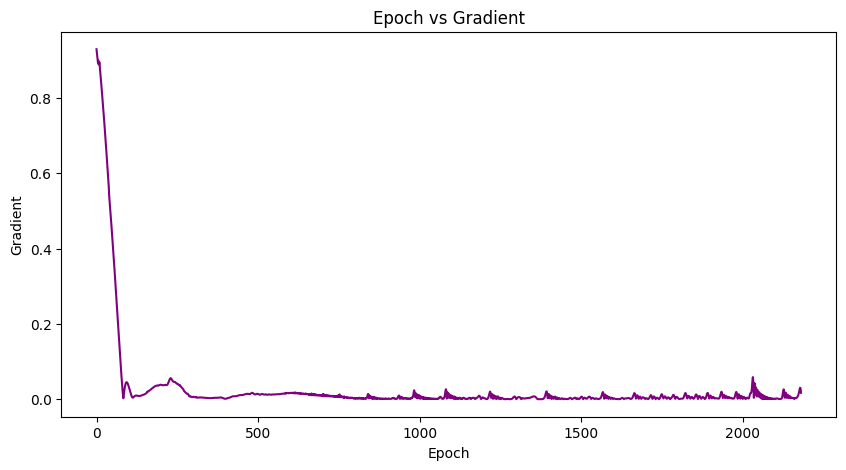

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(epoch_arr, grad_arr, color = "purple")
plt.title('Epoch vs Gradient')
plt.xlabel('Epoch')
plt.ylabel('Gradient')
plt.show()

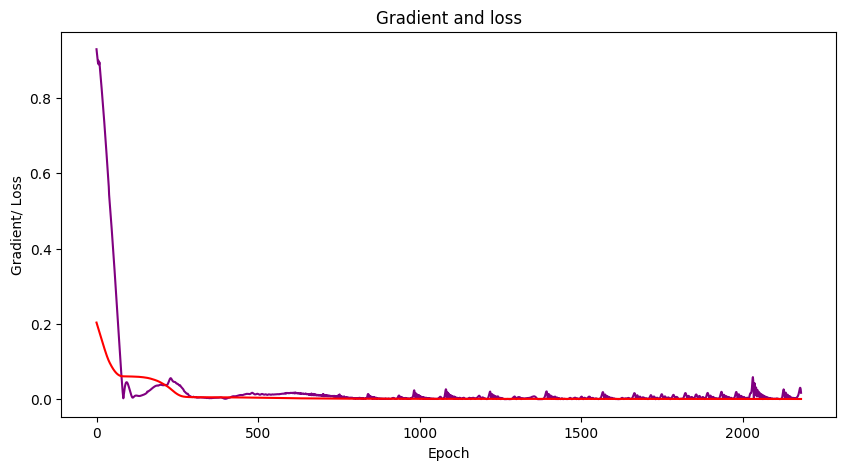

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(epoch_arr, grad_arr, color = "purple")
plt.plot(epoch_arr, loss_arr, color = "red")
plt.title('Gradient and loss')
plt.xlabel('Epoch')
plt.ylabel('Gradient/ Loss')
plt.show()